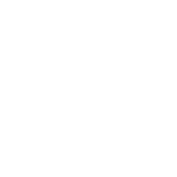

In [17]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from visualization import plot_ellipsoid, plot_line
import numpy as np
from bvh import Bvh

anim = Bvh()
anim.parse_file("/home/yi/Desktop/momask-codes/generation/walking/sample9_repeat9_len196.bvh")

frame_length = 196  # 假设动画长度为20帧

fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 2)
ax.view_init(elev=15, azim=140)
plt.axis('off')

def update(frame_ind):
    ax.clear()  # 清除上一帧的图像
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(0, 2)
    ax.view_init(elev=15, azim=140)
    plt.axis('off')
    
    positions, rotations = anim.frame_pose(frame_ind)
    print(positions.shape)

    positions[:, [-1, -2]] = positions[:, [-2, -1]]
    print(positions.shape)

    # 定义不同身体部位的索引列表
    index_lists = {
        'left_leg': [0, 1, 2, 3, 4, 5],
        'right_leg': [0, 6, 7, 8, 9, 10],
        'middle': [0, 11, 12, 13, 14, 15, 16],
        'left_arm': [13, 17, 18, 19, 20, 21],
        'right_arm': [13, 22, 23, 24, 25, 26],
    }

    # 用不同的minor_radius比例绘制不同部位
    minor_radius_ratios = {'left_leg': 0.1, 'right_leg': 0.1, 'middle': 0.5, 'left_arm': 0.1, 'right_arm': 0.1}

    for part, indices in index_lists.items():
        for i in range(len(indices)-1):
            A = positions[indices[i]]
            B = positions[indices[i + 1]]
            plot_line(ax, A, B)
            #plot_ellipsoid(ax, A, B, minor_radius1_ratio=minor_radius_ratios[part], minor_radius2_ratio=minor_radius_ratios[part])

(27, 3)
(27, 3)


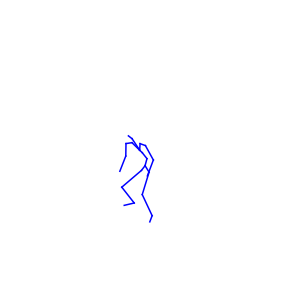

In [22]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 2)
ax.view_init(elev=15, azim=140)
plt.axis('off')
update(0)

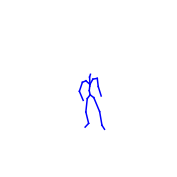

In [3]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 2)
ax.view_init(elev=15, azim=140)
plt.axis('off')
update(frame_length-50)

In [4]:
ani = FuncAnimation(fig, update, frames=frame_length, blit=False)

In [5]:
ani.save_count

<ipython-input-5-315c76047029>:1: MatplotlibDeprecationWarning: The save_count attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  ani.save_count


196

In [6]:
import time

19.698099374771118


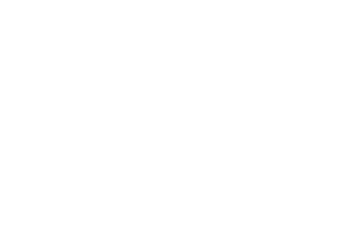

In [8]:
start_time = time.time()
ani.save('animation.gif', writer='imagemagick',fps=50 , dpi = 50)
end_time = time.time()
print(end_time-start_time)

In [12]:
positions_all, rotations_all = anim.all_frame_poses()
positions_all = positions_all.transpose(1, 2, 0)

In [14]:
positions_all.shape[-1]

196

In [9]:
flag = 'line'

In [11]:
flag == 'line'

True

In [24]:
import os
os.cpu_count()

16